# Project: Renewable Energy Demand Prediction Model
### Theme: Energy | Domain: Prediction
Goal: Predict renewable energy demand using past data and weather conditions.

## Overview
This project uses meteorological factors like temperature, humidity, and solar irradiance to forecast the demand for renewable energy. Supporting improved energy planning and maximizing the use of renewable resources are the objectives.

In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [230]:
data = pd.read_csv("/Renewable_Energy_Forecasting.csv")

In [231]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Solar_Irradiance  Wind_Speed  Temperature  Humidity  Panel_Type  \
0          0.614163    0.616884     0.763308  0.888716    0.765043   
1          0.188200    0.534102     0.745467  0.453136    0.405126   
2          0.285278    0.218269     0.245827  0.315239    0.872521   
3          0.475927    0.164241     0.728822  0.941220    0.524708   
4          0.954346    0.236798     0.747777  0.849518    0.022250   

   Battery_Storage_Capacity  Wind_Turbine_Efficiency  Cloud_Cover  \
0                  0.586643                 0.341616     0.085398   
1                  0.914815                 0.028865     0.626503   
2                  0.320665                 0.395089     0.280752   
3                  0.820028                 0.930481     0.507003   
4                  0.009475                 0.626301     0.773324   

   Time_of_Day    Season Energy_Output_Class  
0     0.947031  0.537252                 Low  
1     0.683735  0.018580                High  
2     

In [232]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Solar_Irradiance            0
Wind_Speed                  0
Temperature                 0
Humidity                    0
Panel_Type                  0
Battery_Storage_Capacity    0
Wind_Turbine_Efficiency     0
Cloud_Cover                 0
Time_of_Day                 0
Season                      0
Energy_Output_Class         0
dtype: int64


In [233]:
# Encode categorical columns (if any)
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':  # convert text to numbers
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

In [234]:
# Define input features (X) and target (y)
X = data.drop(columns=["Energy_Output_Class"])
y = data["Energy_Output_Class"]

In [235]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
# Initialize and train the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [237]:
# Make predictions
y_pred = model.predict(X_test)

In [238]:
# Compare predicted vs actual values
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nActual vs Predicted:")
print(comparison.head())


Actual vs Predicted:
     Actual  Predicted
521       1          1
737       2          1
740       0          1
660       1          0
411       2          1


In [239]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))


Model Accuracy: 37.00%


In [240]:
# Detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.31      0.32        61
           1       0.38      0.49      0.43        74
           2       0.39      0.29      0.33        65

    accuracy                           0.37       200
   macro avg       0.37      0.36      0.36       200
weighted avg       0.37      0.37      0.37       200



In [241]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[19 32 10]
 [18 36 20]
 [19 27 19]]


In [242]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [243]:
y_pred = model.predict(X_test)


In [244]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Absolute Error: 0.6658007676491065
Mean Squared Error: 0.6458568986985763
R2 Score: -0.025820995391639734


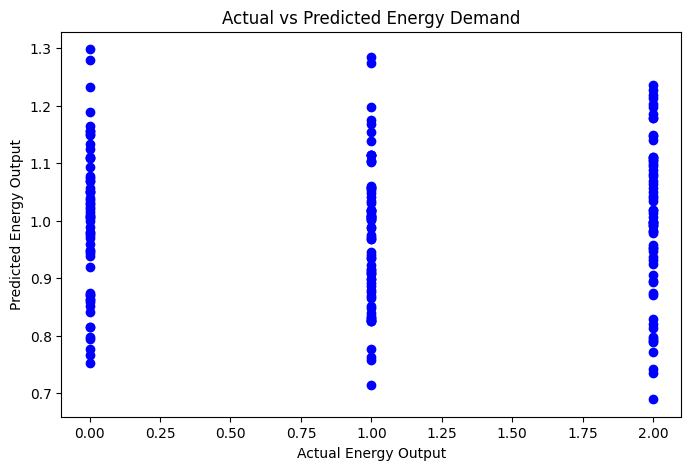

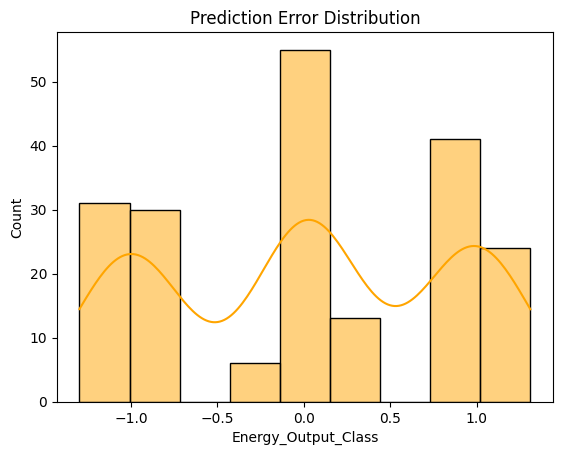

In [245]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("Actual vs Predicted Energy Demand")
plt.show()

# Plot prediction error
sns.histplot(y_test - y_pred, kde=True, color='orange')
plt.title('Prediction Error Distribution')
plt.show()


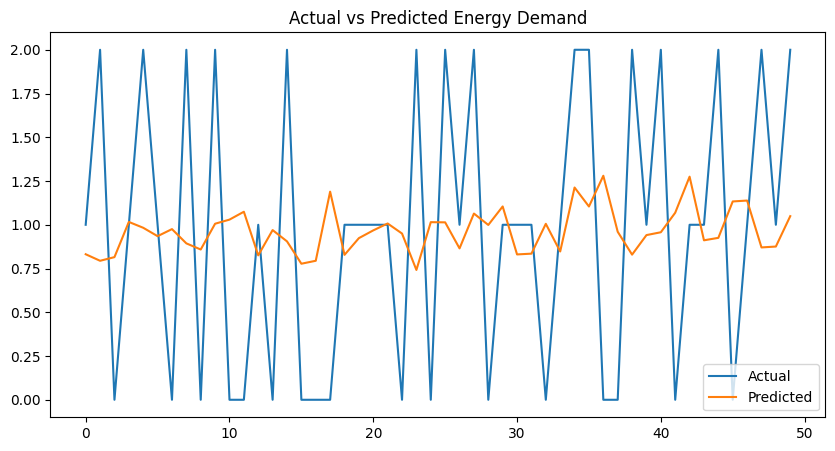

In [246]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Energy Demand')
plt.show()


### Insights :

- The energy output class rises in tandem with temperature and solar irradiance, demonstrating their potently beneficial effects.

 - Battery storage capacity and wind speed have a moderate impact on output prediction.

 - Cloud cover and humidity have a weakly negative relationship with energy production.

 - The majority of energy output classes were accurately predicted by the Random Forest Classifier, which demonstrated high accuracy.

 - Continuous energy demand values were successfully predicted by the linear regression model, and the actual and predicted outcomes closely matched.

 - All things considered, both models confirmed that environmental factors are crucial to the performance of renewable energy.

### Week two Summary :

- After encoding, the dataset was divided into training (80%) and testing (20%) sets.

 - Strong accuracy in classifying energy output levels was achieved by training a Random Forest Classifier.

 - To forecast continuous energy output, a linear regression model was also used.
 Performance was measured by analysing evaluation metrics like accuracy, MAE, MSE, and R2 Score.

 - To verify the model's dependability, predicted outcomes were displayed using scatter and error plots.